#### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

#### Initial steps-making and plotting the points

In [2]:
number_of_points = 500
np.random.seed(3)

# bias_every_point = np.ones(number_of_points)

## top region points
random_x1_values_top = np.random.normal(13, 2, number_of_points)
random_x2_values_top = np.random.normal(12, 2, number_of_points)
top_region_points = np.array([random_x1_values_top, random_x2_values_top]).T
# print(top_region_points.shape)   # // (2, 50), after transpose-> (50, 2)

## bottom region points
random_x1_values_bot = np.random.normal(8, 2, number_of_points)
random_x2_values_bot = np.random.normal(6, 2, number_of_points)
bottom_region_points = np.array([random_x1_values_bot, random_x2_values_bot]).T

## all points
all_points = np.vstack( (top_region_points, bottom_region_points) )

## Label
# y = np.array([np.zeros(number_of_points), np.ones(number_of_points) ] ).reshape(number_of_points * 2, 1)
# print(y.shape)       # // (2, 50), after reshaping -> (100, 1)
# y = np.array([np.zeros(number_of_points), np.ones(number_of_points)]).T
# print(y.shape)         # // (50, 2)
# // for y (label) to be the same size as all points (both = 100), we use np.append()
y = np.matrix(np.append(np.zeros(number_of_points), np.ones(number_of_points) ) ).T
# print(y.shape)  # // (100, 1)

#### Displaying the points

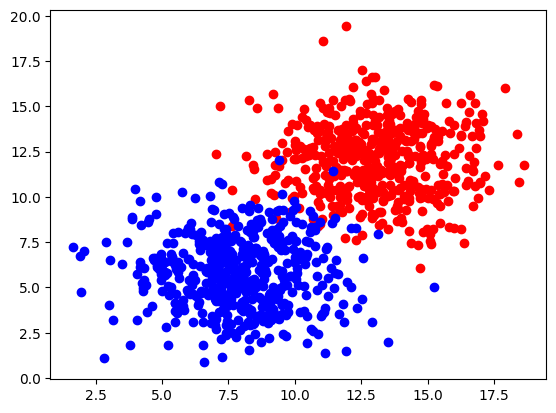

In [3]:
plt.scatter(top_region_points[ : , 0], top_region_points[ : , 1], color='r')
plt.scatter(bottom_region_points[ : , 0], bottom_region_points[ : , 1], color = 'b')

## Sequential Model

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

nn_model = Sequential()

nn_model.add(Dense(units=1, input_shape=(2,), activation='sigmoid') )

# adam = Adam(learning_rate=0.01)
adam = Adam(learning_rate=0.03)
nn_model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'] )

# nn_model_fit = nn_model.fit(x=all_points, y=y, verbose=1, batch_size=50, epochs=100, shuffle='true')
# // or h (the common variable for model.fit)

nn_model_fit = nn_model.fit(x=all_points, y=y, verbose=1, batch_size=15, epochs=20, shuffle='true')

D:\coding projects\PyCharm projects\new projects\S-D-C-2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:73: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6296 - loss: 0.8090
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.7137 - loss: 0.5345
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.8610 - loss: 0.3954
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - accuracy: 0.8982 - loss: 0.3484
Epoch 5/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - accuracy: 0.9437 - loss: 0.2861
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.9543 - loss: 0.2379
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.9636 - loss: 0.2243
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accuracy: 0.9692 - loss: 0.2020
Epoch 9/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.9671 - loss: 0.1865
Epoch 10/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9587 - loss: 0.1829
Epoch 11/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.9770 - loss: 0.1584
Epoch 12/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - a

#### Plotting the accuracy chart/curve

Text(0.5, 1.0, 'Accuracy')

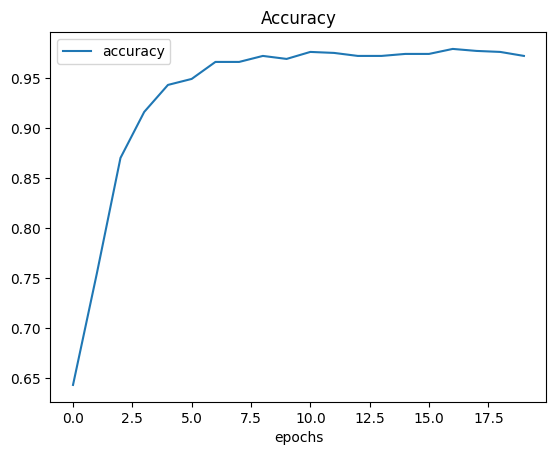

In [5]:
plt.plot(nn_model_fit.history['accuracy'])
plt.xlabel('epochs')
plt.legend(['accuracy'])
plt.title('Accuracy')

## Plotting the loss (error) curve

Text(0.5, 1.0, 'Loss')

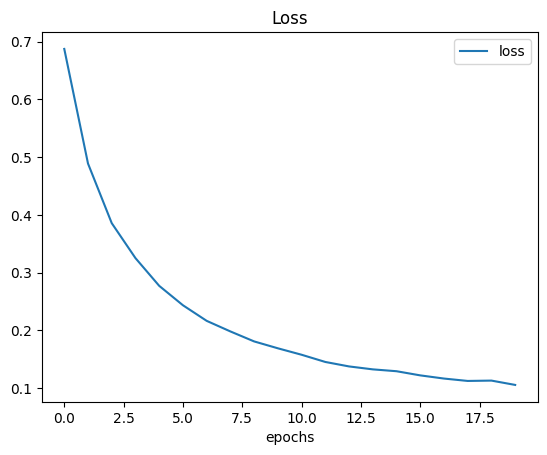

In [6]:
plt.plot(nn_model_fit.history['loss'])
plt.xlabel('epochs')
plt.legend(['loss'])
plt.title('Loss')

## plotting both accuracy and loss together (4 subplots)

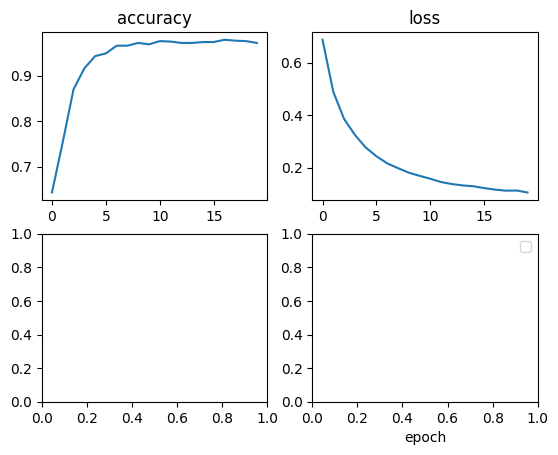

In [7]:
figure, axis = plt.subplots(2, 2)

axis[0, 0].plot(nn_model_fit.history['accuracy'])
axis[0, 0].set_title("accuracy")
plt.xlabel('epoch')
plt.legend(['accuracy'])

axis[0, 1].plot(nn_model_fit.history['loss'])
axis[0, 1].set_title("loss")
plt.xlabel('epoch')
plt.legend(['loss'])

plt.show()